In [1]:
import sys
from os import path as osp
from datetime import datetime
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# torch imports
import torch
from torchvision import transforms
from torch.utils.data.dataloader import DataLoader

# root path of project
from os import path as osp
import sys

# get root directory
import re
reg = '^.*/AquaPose'
project_root = re.findall(reg, osp.dirname(osp.abspath(sys.argv[0])))[0]
sys.path.append(project_root)

from lib.dataset.PoseDataset import PoseDataset
from lib.dataset.custom_transforms import DictToTensor

# references import
# source: https://github.com/pytorch/vision/tree/master/references/detection
from references.transforms import RandomHorizontalFlip, ToTensor, Compose


In [2]:
dataset = PoseDataset(['../../data/vzf/freestyle/freestyle_1'])

transform2 = Compose([ToTensor(), RandomHorizontalFlip(1)])
dataset_flipped = PoseDataset(['../../data/vzf/freestyle/freestyle_1'])

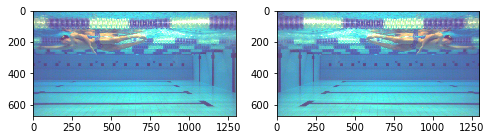

In [3]:
id = 10

def tensor_to_numpy_image(t):
    return t.permute(1, 2, 0).numpy()

imgs = [tensor_to_numpy_image(dataset[id][0]), tensor_to_numpy_image(dataset_flipped[id][0])]

def images_grid(images, rows, columns):
    fig=plt.figure(figsize=(8, 8))

    if len(images) > rows*columns:
        print('too much images for given rows and columns')

    for i, img in enumerate(images):
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(images[i])
    plt.show()

images_grid(imgs, 1, 2)